# About Series

## Series 만들기

### Series란?  

- Data의 컬럼이 1개인 자료구조이며, 인덱스와 1개의 열로 구성되어 있음

### Series 생성 가능 타입  
- pd.Series(리스트)  
    - index 기본 부여, value 생성 
- pd.Series(딕셔너리)  
    - index 생성, value 생성

In [4]:
import pandas as pd

#### List Type의 생성

In [5]:
ls1 = [1,2,3,4,5,6,7,8,9]

sr1 = pd.Series(ls1)
sr1

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64

In [6]:
ls2 = [1,2,3,'Apple','play',6,7,8,9]

sr2 = pd.Series(ls2)
sr2

0        1
1        2
2        3
3    Apple
4     play
5        6
6        7
7        8
8        9
dtype: object

#### 딕셔너리 Type 생성

In [9]:
dic1 = {"a":1, 'b':2, "c":3, "d":4}

sr3 = pd.Series(dic1)
sr3

a    1
b    2
c    3
d    4
dtype: int64

### Value의 Name 지정   
Value 열에 대한 이름을 지정 할 수 있다.

In [7]:
sr1.name ="Number"
sr2.name = "Word"
sr2

0        1
1        2
2        3
3    Apple
4     play
5        6
6        7
7        8
8        9
Name: Word, dtype: object

In [10]:
sr3.name = "Number"
sr3

a    1
b    2
c    3
d    4
Name: Number, dtype: int64

## 외부 파일 읽어오기  
- read_csv()
    - path
    - index_col  
        인덱스로 사용할 열 설정
    - header  
        header의 row 인덱스
    - squeeze  
        default = false  
        ```squeeze = True```  => Series  
        ```squeeze = False``` => DataFrame

In [13]:
import pandas as pd

* Tip  
```pd.read_``` 다음에 ```Tab```을 누르면 Assistant가 뜬다.

In [28]:
path = 'C:/Users/proyj/workspace/python/pandas/삼성전자 종가.csv'
dataFrame = pd.read_csv(path)
dataFrame

,Date,Close
0,2018-01-02,51020
1,2018-01-03,51620
2,2018-01-04,51080
3,2018-01-05,52120
4,2018-01-08,52020
...,...,...
972,2021-12-13,76800
973,2021-12-14,77000
974,2021-12-15,77600
975,2021-12-16,77800


In [29]:
dataFrame = pd.read_csv(path, index_col = 1) # 2번째 열이 인덱스로 쓰임
dataFrame

,Date
Close,
51020,2018-01-02
51620,2018-01-03
51080,2018-01-04
52120,2018-01-05
52020,2018-01-08
...,...
76800,2021-12-13
77000,2021-12-14
77600,2021-12-15


In [30]:
dataFrame = pd.read_csv(path, header = 1) # 2번째 행이 Header로 쓰임
dataFrame

,2018-01-02,51020
0,2018-01-03,51620
1,2018-01-04,51080
2,2018-01-05,52120
3,2018-01-08,52020
4,2018-01-09,50400
...,...,...
971,2021-12-13,76800
972,2021-12-14,77000
973,2021-12-15,77600
974,2021-12-16,77800


In [33]:
type(dataFrame) # squeeze 없으면 DataFrame

pandas.core.frame.DataFrame

In [31]:
series = pd.read_csv(path, index_col = 0, header = 0 , squeeze = True)
series

C:\Users\proyj\AppData\Local\Temp\ipykernel_9764\1006839771.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv(path, index_col = 0, header = 0 , squeeze = True)


Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [32]:
type(series)

pandas.core.series.Series

### Tip : pd.set_option('display.max_rows', None) / pd.reset_option("display.max_rows")
    - 미리보기에 생략된 데이터를 다 보려면  
    ```pd.set_option('display.max_rows', None)```
    - 해제 하려면  
    ```pd.reset_option("display.max_rows")```

## Series의 Index와 value

### Index

In [35]:
samsung_series = a
samsung_series.index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-15',
       ...
       '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
       '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17'],
      dtype='object', name='Date', length=977)

In [36]:
type(samsung_series.index)

pandas.core.indexes.base.Index

#### 해당 인덱스가 포함 여부 확인

In [38]:
# # 해당 index가 포함 되지 않은 경우
'2018-01-01' in samsung_series.index

False

In [37]:
# 해당 index가 포함 된 경우
'2018-01-02' in samsung_series.index

True

In [13]:
# Series의 index 포함 여부 확인
'2018-01-02' in samsung_series.index

True

### loc 와 iloc
- series.loc()  
    - 데이터프레임의 행이나 컬럼에 **label**이나 boolean array로 접근.  
    - location의 약어로, 인간이 읽을 수 있는 label 값으로 데이터에 접근하는 것이다.   
- series.iloc()  
    - 데이터프레임의 행이나 컬럼에 **인덱스 값**으로 접근.  
    - integer location의 약어로, 컴퓨터가 읽을 수 있는 indexing 값으로 데이터에 접근하는 것이다.


#### loc[ ]
해당 레이블이 존재하지 않으면 에러 발생

In [40]:
samsung_series.loc['2018-01-01']

KeyError: '2018-01-01'

In [17]:
samsung_series.loc['2018-01-02']

51020

#### 레이블로 값 찾는 예제

In [24]:
# 레이블로 값찾는 예제 
date = '2018-01-01'
if date in samsung_series.index:
    print(samsung_series.loc[date])
else:
    print('찾는 값이 없습니다.')
        

찾는 값이 없습니다.


#### iloc[ ]

In [23]:
#index로 찾기
samsung_series.iloc[0]

51020

### Series의 크기

#### 크기 series.shape[0]

In [27]:
samsung_series.shape

(977,)

그런데 형태가 좀 이상하다..

In [28]:
type(samsung_series.shape)

tuple

#### 마지막 인덱스 series.shape[0]-1

In [29]:
samsung_series.shape[0]-1

976

### value의 변경

#### value를 나타내는 방법  
- 다음 3가지로 쓴다  
series.['2018-01-01'] (가능은 하지만 아래와 같이 명시적으로 써 주는게 좋다)  
series.loc['2018-01-01']   
series.iloc[1]

In [41]:
# 값 변경
samsung_series.loc['2018-01-02'] = 0
samsung_series

Date
2018-01-02        0
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

#### Series의 마지막에 값 추가

In [43]:
## 추가될 인덱스에 값을 할당하는 방식 => 에러
samsung_series.iloc[samsung_series.shape[0]] = 77100

IndexError: iloc cannot enlarge its target object

In [46]:
## 값 추가
samsung_series['2021-12-18'] = 77100
samsung_series

Date
2018-01-02        0
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
2021-12-18    77100
2021-12-19    77200
Name: Close, Length: 979, dtype: int64

In [47]:
samsung_series.loc['2021-12-19'] = 77200
samsung_series.shape[0]

979

In [46]:
samsung_series.iloc[978] = 77300
samsung_series

Date
2018-01-02        0
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
2021-12-18    77100
2021-12-19    77300
Name: Close, Length: 979, dtype: int64

## 두개의 Series 연결



### series.append(other_series, )

In [51]:
import pandas as pd
#pd.set_option('display.max_rows', None)

In [49]:
series1_samsung = pd.read_excel('samsung_excel.xlsx', sheet_name = 'Sheet1', index_col = 0, squeeze = True)
series1_samsung

C:\Users\proyj\AppData\Local\Temp\ipykernel_9764\3120514832.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series1_samsung = pd.read_excel('samsung_excel.xlsx', sheet_name = 'Sheet1', index_col = 0, squeeze = True)


Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2019-12-23    55500
2019-12-24    55000
2019-12-26    55400
2019-12-27    56500
2019-12-30    55800
Name: Close, Length: 490, dtype: int64

```sheet_name = 0``` 이라고 할 수도 있음

In [50]:
series2_samsung = pd.read_excel('samsung_excel.xlsx', sheet_name = 'Sheet2', index_col = 0, squeeze = True)
series2_samsung

C:\Users\proyj\AppData\Local\Temp\ipykernel_9764\969072097.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series2_samsung = pd.read_excel('samsung_excel.xlsx', sheet_name = 'Sheet2', index_col = 0, squeeze = True)


Date
2020-01-02    55200
2020-01-03    55500
2020-01-06    55500
2020-01-07    55800
2020-01-08    56800
              ...  
2021-12-20    77100
2021-12-21    78100
2021-12-22    79400
2021-12-23    79900
2021-12-24    80500
Name: Close, Length: 492, dtype: int64

In [52]:
# output 을 전체 다 볼 수 있음
pd.set_option('display.max_rows', None)

### ignore_index = False  
ref) https://wikidocs.net/154051  
기존의 인덱스 유지하고자 할때

```ignore_index = False``` # False: 기존 index 유지, True: 기존 index 무시

In [66]:
# ignore_index = True 시 기존 인덱스 무시
series_samsung = series1_samsung.append(series2_samsung, ignore_index = True)
series_samsung

C:\Users\proyj\AppData\Local\Temp\ipykernel_9764\1466658145.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  series_samsung = series1_samsung.append(series2_samsung, ignore_index = True)


0      51020
1      51620
2      51080
3      52120
4      52020
       ...  
977    77100
978    78100
979    79400
980    79900
981    80500
Name: Close, Length: 982, dtype: int64

In [67]:
series_samsung = series1_samsung.append(series2_samsung, ignore_index = False)
series_samsung

C:\Users\proyj\AppData\Local\Temp\ipykernel_9764\1297777962.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  series_samsung = series1_samsung.append(series2_samsung, ignore_index = False)


Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-20    77100
2021-12-21    78100
2021-12-22    79400
2021-12-23    79900
2021-12-24    80500
Name: Close, Length: 982, dtype: int64

## Series 기본 통계치 구하기

### 기본 통계치 series.dscribe()

In [61]:
# 기본 통계치
samsung_price.describe()


count      977.000000
mean     57295.854657
std      14084.402274
min      37450.000000
25%      46300.000000
50%      51300.000000
75%      70200.000000
max      91000.000000
Name: Close, dtype: float64

#### 분위값 percentiles  
- 기본값 [.25, .5, .75]  
ref) https://pandas.pydata.org/docs/reference/api/pandas.Series.describe.html

In [69]:
samsung_price.describe(percentiles=[.2,.3,.4,.5,.6,.7,.8])

count      977.000000
mean     57295.854657
std      14084.402274
min      37450.000000
20%      45600.000000
30%      46950.000000
40%      49176.000000
50%      51300.000000
60%      55460.000000
70%      60400.000000
80%      74400.000000
max      91000.000000
Name: Close, dtype: float64

### series.max()

In [57]:
# option default로 변경
pd.reset_option("display.max_rows")

In [58]:
samsung_price = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)
samsung_price

C:\Users\proyj\AppData\Local\Temp\ipykernel_9764\3135519495.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  samsung_price = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)


Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [59]:
# 최고값
samsung_price.max()

91000

### series.min()

In [60]:
# 최저값
samsung_price.min()

37450

### series.count()

In [68]:
samsung_price.count()

977

## 최고값일때의 value와 날짜는 언제일까?

### Numpy의 Broadcasting  
*** v. broadcast ***  

to spread widely; disseminate:  

차원이 다른 행렬의 연산을 가능하게 한다.  


#### broadcasting의 조건
브로드캐스팅이 일어날 수 있는 조건은 다음과 같다.  
- 차원의 크기가 1일때 가능하다  
    두 배열 간의 연산에서 최소한 하나의 배열의 차원이 1이라면 가능하다.  
- 차원의 짝이 맞을 때 가능하다  
    차원에 대해 축의 길이가 동일하면 브로드캐스팅이 가능하다.

- 1X3 + 1X1 => 1X3 + 1X3  
ex) [0,1,2] + 5 = [0,1,2] + [5,5,5] = [5,6,7] 

- 3X3 + 1X3 => 3X3 + 3X3  
ex) [[1,1,1], [1,1,1], [1,1,1]] + [0,1,2]  
    =>  
    [[1,1,1], [1,1,1], [1,1,1]] + [[0,1,2],[0,1,2],[0,1,2]] = [[1,2,3], [1,2,3], [1,2,3]]  
   
- 3X1 + 1X3 => 3X3 + 3X3  
ex) [[0],[1],[2]] + [0,1,2]  
    =>
    [[0,0,0],[1,1,1],[2,2,2]] + [[0,1,2],[0,1,2],[0,1,2]] = [[0,1,2],[1,2,3],[2,3,4]]  

ref) https://sacko.tistory.com/16  

### max 값 비교로 찾을 것인가?

***생각의 과정***  
처음에는 배열을 비교하여 최고값의 개수를

In [62]:
samsung_price.values

array([51020, 51620, 51080, 52120, 52020, 50400, 48840, 48240, 48200,
       48540, 50000, 49620, 49900, 49320, 48240, 49160, 49340, 50260,
       50780, 51220, 49800, 49900, 49820, 47700, 47920, 47420, 45800,
       46000, 44700, 45720, 47540, 49000, 48380, 47400, 47280, 46760,
       47220, 47380, 47380, 47060, 46020, 45200, 47020, 48620, 49200,
       49740, 49740, 51660, 51760, 51540, 51140, 50740, 51200, 51060,
       51780, 49720, 50280, 49980, 48700, 49040, 49220, 48540, 48120,
       46920, 48740, 48400, 49200, 48880, 48860, 49000, 49800, 50340,
       49980, 51360, 52780, 51620, 51900, 50460, 50400, 52140, 53000,
       53000, 53000, 53000, 51900, 52600, 50900, 51600, 51300, 50100,
       49200, 49850, 49400, 49500, 50000, 51800, 51400, 52700, 52300,
       51300, 49500, 50700, 51300, 51100, 51300, 50600, 49650, 49900,
       49400, 48200, 47650, 46600, 47000, 47000, 47050, 47250, 46650,
       47000, 47950, 46800, 46650, 45550, 46150, 46250, 45950, 44900,
       45600, 46300,

In [63]:
type(samsung_price.values)

numpy.ndarray

In [74]:
samsung_price.values == samsung_price.max()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

### 최고값과 그 날짜  
- 최고값  
    samsung_price.max()  
- 최고값인 날짜  
    samsung_price.index[samsung_price.values == samsung_price.max()]  


In [76]:
samsung_price.index[samsung_price.values == samsung_price.max()]

Index(['2021-01-11'], dtype='object', name='Date')

In [79]:
samsung_price.values == 41000

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [78]:
samsung_price.index[samsung_price.values == 41000]

Index(['2018-10-25', '2018-10-26'], dtype='object', name='Date')

### 최고값과 최소값의 인덱스 리턴하는 argmin(), argmax()

* 최소값의 인덱스, 최대값의 인덱스  
```argmin()```, ```argmax()```

In [81]:
## 해당하는 인덱스 값 리턴
samsung_price.argmin()

246

cf. samsung_price.min() => 최소값, samsung_price.argmin() => 최소값의 인덱스

In [83]:
samsung_price.iloc[samsung_price.argmin()]

37450

In [84]:
samsung_price.index[samsung_price.argmin()]

'2019-01-04'

In [85]:
samsung_price.iloc[samsung_price.argmax()]
samsung_price.index[samsung_price.argmax()]

'2021-01-11'

#### series.index[series.argmax()] vs series.index[series.values == series.max()] 

In [73]:
# 배열이다 
samsung_price.index[samsung_price.values == samsung_price.max()]

Index(['2021-01-11'], dtype='object', name='Date')

In [ ]:
# 값이다
samsung_price.max()
samsung_price.loc['2021-12-18'] = 91000
samsung_price

In [81]:
samsung_price.index[samsung_price.argmax()]

'2021-01-11'

In [82]:
samsung_price.index[samsung_price.values == samsung_price.max()]

Index(['2021-01-11', '2021-12-18'], dtype='object', name='Date')

In [83]:
samsung_price.index[samsung_price.values == samsung_price.max()][0]

'2021-01-11'

## Series 연산

ref) markdown 수식 작성 방법  

https://velog.io/@d2h10s/LaTex-Markdown-%EC%88%98%EC%8B%9D-%EC%9E%91%EC%84%B1%EB%B2%95

### 수익률 식대로 구하기

 수익률 구하는 식  
 $$ r_t = \frac{ P_t - P_{t-1} }{ P_{t-1}} = \frac{ P_t}{P_{t-1}} -1 $$ 

In [87]:
import pandas as pd

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)
samsung_price

C:\Users\proyj\AppData\Local\Temp\ipykernel_9764\377234668.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  samsung_price = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)


Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [89]:
samsung_price.shift(1)

Date
2018-01-02        NaN
2018-01-03    51020.0
2018-01-04    51620.0
2018-01-05    51080.0
2018-01-08    52120.0
               ...   
2021-12-13    76900.0
2021-12-14    76800.0
2021-12-15    77000.0
2021-12-16    77600.0
2021-12-17    77800.0
Name: Close, Length: 977, dtype: float64

In [90]:
samsung_price - samsung_price.shift(1)

Date
2018-01-02       NaN
2018-01-03     600.0
2018-01-04    -540.0
2018-01-05    1040.0
2018-01-08    -100.0
               ...  
2021-12-13    -100.0
2021-12-14     200.0
2021-12-15     600.0
2021-12-16     200.0
2021-12-17     200.0
Name: Close, Length: 977, dtype: float64

In [91]:
samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

### 수익률 구하기 함수 series.pct_change()

In [94]:
pct_change = samsung_price.pct_change()
pct_change

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

### 수익률이 최대였던 때와 최대 수익율

In [96]:
samsung_return.max()

0.10470588235294118

In [97]:
samsung_return.index[samsung_return.argmax()]

'2020-03-24'

#### Nan값 연산  
- samsung_return.dropna()  
    Nan값 제외  
- samsung_return.fillna()  
    Nan값 채우기, 입력값 없으면 에러

In [105]:
samsung_return.dropna()

Date
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
2018-01-09   -0.031142
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 976, dtype: float64

In [106]:
samsung_return.fillna(1)

Date
2018-01-02    1.000000
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

In [108]:
samsung_return.fillna('없음')

Date
2018-01-02          없음
2018-01-03     0.01176
2018-01-04   -0.010461
2018-01-05     0.02036
2018-01-08   -0.001919
                ...   
2021-12-13     -0.0013
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: object

In [107]:
samsung_return.fillna()

ValueError: Must specify a fill 'value' or 'method'.

## Series 정렬

- 레이블 순 정렬  
    series.sort_index(ascending = True or False)  
- 값 순 정렬  
    series.sort_index(ascending = True or False)  
    

### 레이블 순 정렬  
series.sort_index(ascending = True or False)

In [109]:
samsung_price.sort_index(ascending = True)

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

### 값 순 정렬  
series.sort_value(ascending = True or False)

In [112]:
samsung_price.sort_values(ascending = True)

Date
2019-01-04    37450
2019-01-03    37600
2019-01-08    38100
2018-12-27    38250
2018-12-26    38350
              ...  
2021-01-25    89400
2021-01-13    89700
2021-01-14    89700
2021-01-12    90600
2021-01-11    91000
Name: Close, Length: 977, dtype: int64

### head()
series.sort_value(ascending = True or False)

In [113]:
samsung_price.sort_values(ascending = False).head(30)

Date
2021-01-11    91000
2021-01-12    90600
2021-01-14    89700
2021-01-13    89700
2021-01-25    89400
2021-01-08    88800
2021-01-21    88100
2021-01-15    88000
2021-01-20    87200
2021-01-19    87000
2021-01-22    86800
2021-01-26    86700
2021-04-06    86000
2021-01-27    85600
2021-04-07    85600
2021-04-05    85400
2021-02-25    85300
2021-01-18    85000
2021-02-16    84900
2021-04-02    84800
2021-04-08    84700
2021-02-03    84600
2021-02-02    84400
2021-02-15    84200
2021-04-15    84100
2021-04-13    84000
2021-04-14    84000
2021-03-03    84000
2021-04-16    83900
2021-04-20    83900
Name: Close, dtype: int64

## Series 조건설정

### series[조건문] , series.index[조건문], series.values[조건문]

#### Q) 삼성전자 수익률이 4% 이상일때의 빈도수 구하기

In [124]:
import pandas as pd

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)
samsung_price
samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return

C:\Users\proyj\AppData\Local\Temp\ipykernel_9764\1004301668.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  samsung_price = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)


Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

In [125]:
samsung_return = samsung_return*100
samsung_return

Date
2018-01-02         NaN
2018-01-03    1.176009
2018-01-04   -1.046106
2018-01-05    2.036022
2018-01-08   -0.191865
                ...   
2021-12-13   -0.130039
2021-12-14    0.260417
2021-12-15    0.779221
2021-12-16    0.257732
2021-12-17    0.257069
Name: Close, Length: 977, dtype: float64

In [127]:
samsung_return > 4

Date
2018-01-02    False
2018-01-03    False
2018-01-04    False
2018-01-05    False
2018-01-08    False
              ...  
2021-12-13    False
2021-12-14    False
2021-12-15    False
2021-12-16    False
2021-12-17    False
Name: Close, Length: 977, dtype: bool

In [128]:
type(samsung_return > 4)

pandas.core.series.Series

In [130]:
samsung_return.values > 4

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [134]:
type(samsung_return.values > 4)

numpy.ndarray

In [136]:
sum(samsung_return > 4)

17

In [135]:
sum(samsung_return.values > 4)

17

In [137]:
samsung_return[samsung_return.values > 4]

Date
2018-03-06     4.026549
2018-09-14     4.086266
2018-11-02     4.744958
2019-03-21     4.086266
2020-03-20     5.704307
2020-03-24    10.470588
2020-04-17     4.897959
2020-06-03     6.031128
2020-06-16     4.408818
2020-07-28     5.395683
2020-11-16     4.905063
2020-11-23     4.327666
2020-12-24     5.277402
2021-01-08     7.117008
2021-02-25     4.024390
2021-11-22     5.196629
2021-12-01     4.347826
Name: Close, dtype: float64

In [138]:
samsung_return.index[samsung_return.values > 4]

Index(['2018-03-06', '2018-09-14', '2018-11-02', '2019-03-21', '2020-03-20',
       '2020-03-24', '2020-04-17', '2020-06-03', '2020-06-16', '2020-07-28',
       '2020-11-16', '2020-11-23', '2020-12-24', '2021-01-08', '2021-02-25',
       '2021-11-22', '2021-12-01'],
      dtype='object', name='Date')

In [139]:
samsung_return.values[samsung_return.values > 4]

array([ 4.02654867,  4.08626561,  4.74495848,  4.08626561,  5.70430733,
       10.47058824,  4.89795918,  6.0311284 ,  4.40881764,  5.39568345,
        4.90506329,  4.32766615,  5.27740189,  7.11700844,  4.02439024,
        5.19662921,  4.34782609])

In [142]:
over_4_ratio = sum(samsung_return.values > 4) / samsung_return.shape[0] * 100
over_4_ratio

1.7400204708290685

### np.where(조건문,참일때 값,거짓일때 값)

#### Q) 삼성전자 수익률이 4% 이상를 나타내는 새로운 Series 생성해 보자 보자


In [146]:
import numpy as np

frq_over_4 = np.where(samsung_return.values >=4, 1, 0)
frq_over_4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## rolling 이동 평균 
각 요소 일자 이전의 구간만큼의 평균

### series.rolling(window=days)  
ref) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html


#### Q) 30일 이동 평균을 구해보자

In [147]:
import pandas as pd
import numpy as np

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)
samsung_price


C:\Users\proyj\AppData\Local\Temp\ipykernel_9764\1281495559.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  samsung_price = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)


Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [149]:
samsung_price.rolling(window =30).mean()

Date
2018-01-02             NaN
2018-01-03             NaN
2018-01-04             NaN
2018-01-05             NaN
2018-01-08             NaN
                  ...     
2021-12-13    73090.000000
2021-12-14    73273.333333
2021-12-15    73513.333333
2021-12-16    73753.333333
2021-12-17    74013.333333
Name: Close, Length: 977, dtype: float64

<AxesSubplot:xlabel='Date'>

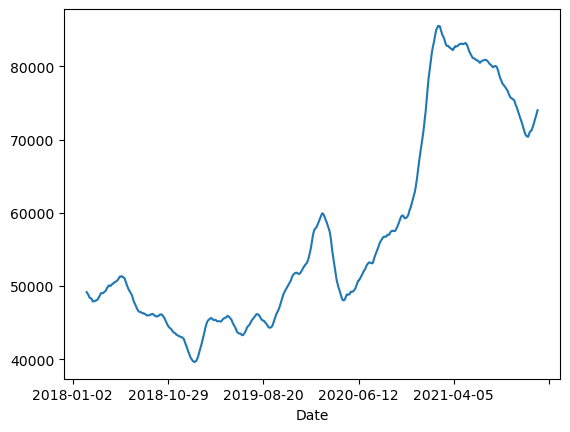

In [151]:
samsung_price.rolling(window =30).mean().plot()

## cut, qcut 데이터 구간 나누기

In [152]:
import pandas as pd
import numpy as np

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)
samsung_price
samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return

C:\Users\proyj\AppData\Local\Temp\ipykernel_9764\3633567279.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  samsung_price = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)


Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

### pd.cut(series, bins = N) N등분하기

In [153]:
pd.cut(samsung_return, bins=10)

Date
2018-01-02                   NaN
2018-01-03     (0.00356, 0.0204]
2018-01-04    (-0.0133, 0.00356]
2018-01-05     (0.00356, 0.0204]
2018-01-08    (-0.0133, 0.00356]
                     ...        
2021-12-13    (-0.0133, 0.00356]
2021-12-14    (-0.0133, 0.00356]
2021-12-15     (0.00356, 0.0204]
2021-12-16    (-0.0133, 0.00356]
2021-12-17    (-0.0133, 0.00356]
Name: Close, Length: 977, dtype: category
Categories (10, interval[float64, right]): [(-0.064, -0.047] < (-0.047, -0.0302] < (-0.0302, -0.0133] < (-0.0133, 0.00356] ... (0.0373, 0.0541] < (0.0541, 0.071] < (0.071, 0.0878] < (0.0878, 0.105]]

In [154]:
pd.cut(samsung_return, bins=10).value_counts()

(-0.0133, 0.00356]    414
(0.00356, 0.0204]     298
(-0.0302, -0.0133]    137
(0.0204, 0.0373]       70
(-0.047, -0.0302]      31
(0.0373, 0.0541]       19
(-0.064, -0.047]        3
(0.0541, 0.071]         2
(0.071, 0.0878]         1
(0.0878, 0.105]         1
Name: Close, dtype: int64

### pd.qcut(series, N) N개씩 나누기


In [155]:
pd.qcut(samsung_return, 10)

Date
2018-01-02                    NaN
2018-01-03      (0.00753, 0.0122]
2018-01-04    (-0.0116, -0.00702]
2018-01-05          (0.02, 0.105]
2018-01-08        (-0.00332, 0.0]
                     ...         
2021-12-13        (-0.00332, 0.0]
2021-12-14         (0.0, 0.00358]
2021-12-15      (0.00753, 0.0122]
2021-12-16         (0.0, 0.00358]
2021-12-17         (0.0, 0.00358]
Name: Close, Length: 977, dtype: category
Categories (10, interval[float64, right]): [(-0.0649, -0.0194] < (-0.0194, -0.0116] < (-0.0116, -0.00702] < (-0.00702, -0.00332] ... (0.00358, 0.00753] < (0.00753, 0.0122] < (0.0122, 0.02] < (0.02, 0.105]]

In [156]:
pd.qcut(samsung_return, 10).value_counts()

(-0.00332, 0.0]         108
(-0.0649, -0.0194]       98
(-0.0194, -0.0116]       98
(-0.00702, -0.00332]     98
(0.00753, 0.0122]        98
(0.02, 0.105]            98
(-0.0116, -0.00702]      97
(0.00358, 0.00753]       97
(0.0122, 0.02]           97
(0.0, 0.00358]           87
Name: Close, dtype: int64

## 크기가 다른 두 시리즈 , 연관관계
인덱스 맞춰주는게 좋다.

In [158]:
import pandas as pd
import numpy as np

samsung = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)
samsung

kospi = pd.read_csv("KOSPI.csv", index_col = 0, squeeze = True, header = 0)
kospi

C:\Users\proyj\AppData\Local\Temp\ipykernel_9764\3448150344.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  samsung = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)
C:\Users\proyj\AppData\Local\Temp\ipykernel_9764\3448150344.py:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  kospi = pd.read_csv("KOSPI.csv", index_col = 0, squeeze = True, header = 0)


Date
2020-01-02    2175.17
2020-01-03    2176.46
2020-01-06    2155.07
2020-01-07    2175.54
2020-01-08    2151.31
               ...   
2021-12-13    3001.66
2021-12-14    2987.95
2021-12-15    2989.39
2021-12-16    3006.41
2021-12-17    3017.73
Name: Close, Length: 477, dtype: float64

In [164]:
#print(samsung.shape)
samsung
samsung = samsung.loc['2020-01-02':] # 일단 갯수적당히 좀 맞춰보자
samsung
print(samsung.shape)

(487,)


In [161]:
print(kospi.shape)
kospi

(477,)


Date
2020-01-02    2175.17
2020-01-03    2176.46
2020-01-06    2155.07
2020-01-07    2175.54
2020-01-08    2151.31
               ...   
2021-12-13    3001.66
2021-12-14    2987.95
2021-12-15    2989.39
2021-12-16    3006.41
2021-12-17    3017.73
Name: Close, Length: 477, dtype: float64

samsung 인덱스 $\subset$ kospi 인덱스 인경우 가능

In [162]:
samsung_re = samsung.loc[kospi.index] 
samsung_re.shape

(477,)

In [163]:
samsung_re = samsung.loc[kospi.index]
samsung_re.shape

(477,)